In [1]:
!pip install pandas

You should consider upgrading via the '/opt/sagemath-9.2/local/bin/python3 -m pip install --upgrade pip' command.


In [2]:
import numpy as np
import pandas as pd
%display typeset

Calculando dX/dt:

In [3]:
var('X mu D t')
X = function('X')(t)
dxdt = diff(X,t) == mu*X-D*X
dxdt

diff(X(t), t) == -D*X(t) + mu*X(t)

Calculando dS/dt:

In [4]:
var('S mu D Sf X Y t')
S = function('S')(t)
dsdt = diff(S,t) == D*Sf - D*S -(mu*X/Y)
dsdt

diff(S(t), t) == D*Sf - D*S(t) - X*mu/Y

Desenvolvendo a matriz jacobiana:

In [5]:
var('S X mu D Y Sf x s')
J = jacobian([mu*x-D*x, D*Sf - D*s -(mu*x/Y)],[x,s])
J

[-D + mu       0]
[  -mu/Y      -D]

Calculando o traço (p):

In [6]:
J.trace()

-2*D + mu

Calculando o determinante (q):

In [7]:
J.det()

(D - mu)*D

Autovetores:

In [124]:
J.eigenvectors_right()

[(-D + mu, [(1, -1/Y)], 1), (-D, [(0, 1)], 1)]

Autovalores:

In [8]:
J.eigenvalues()

[-D + mu, -D]

$\lambda_1$: -D

$\lambda_2$: -D+mu

Os autovalores são reais e distintos, já que mu > 0 (mu é taxa de crescimento específica; 1/Tempo): 

Se mu>D, os sinais dos autovalores são opostos ($\lambda_1$<0<$\lambda_2$): Equilíbrio instável em ponto de sela 

Se mu<D, os sinais dos autovalores são iguais, nesse caso negativos, já que D é taxa de diluição e portanto não pode ser negativo ($\lambda_1$<$\lambda_2$<0): Equilíbrio pontual estável

Se mu=D, um dos autovalores será 0. Nesse caso o modelo ficará constante, como pode ser visto mais adiante no notebook.

Note que mu-D será sempre maior que -D, logo mu-D será o autovalor dominante $(\lambda_d)$

Polinômio característico:

In [119]:
J.characteristic_polynomial()

x^2 + (2*D - mu)*x + D^2 - D*mu

In [120]:
J.characteristic_polynomial().roots()

[(-D + mu, 1), (-D, 1)]

In [121]:
J.jordan_form()

[-D + mu|      0]
[-------+-------]
[      0|     -D]

In [11]:
p = J.trace
print(p)

q = J.det
print(q)

<built-in method trace of sage.matrix.matrix_symbolic_dense.Matrix_symbolic_dense object at 0x6fff2c52ead0>
<built-in method det of sage.matrix.matrix_symbolic_dense.Matrix_symbolic_dense object at 0x6fff2c52ead0>


p = -2D+mu

q = D^2 - muD

Δ=p^2-4*q

p^2 = (mu-2D)^2 = mu^2 -4muD +4D^2

4q = 4(D^2 - muD) = 4D^2 - 4muD

Δ = mu^2 -4muD +4D^2 - (4D^2 - 4muD) = mu^2

Calculando o equilíbrio pontual do sistema:

In [110]:
var('S X mu D Y Sf x s')
xdot(x,s) = mu*x-D*x
sdot(x,s) = D*Sf - D*s -(mu*x/Y)
solve([xdot, sdot], [x,s])

[[x == 0, s == Sf]]

In [114]:
dxdt = mu*X-D*X
dsdt = D*Sf - D*S -(mu*X/Y)

solve([dxdt,dsdt], [X,S])

[[X == 0, S == Sf]]

*-----------------------------------------------------------------------------------------------------*

'Raízes=' [x == 0]

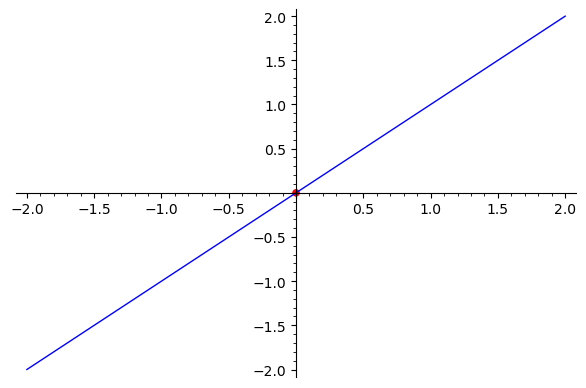

In [34]:
var('mu D')
f(x) = mu*x - D*x
raízes = solve(f,x)
show("Raízes=",raízes)
F=plot(f(mu=2, D=1),(x,-2,2))
P=points([(0,0)], pointsize=30, color='red')
F+P

In [35]:
@interact
def linear(mu=(-2,2,1),D=(-1,1,1)):
    P = plot(f(mu=mu, D=D), (x,-1.5,1.5))
    raízes = solve(f,x)
    show("Raízes=",raízes)
    P2=points([(0,0)], pointsize=30, color='red')
    show(P+P2)

Interactive function <function linear at 0x6fff26b28560> with 2 widgets
  mu: IntSlider(value=0, description='mu', max=2, min=-2)
  D: IntSlider(value=0, description='D', max=1, min=-1)

In [36]:
var('x s mu D Sf X S mumax Ks')

mu==mumax*s/(Ks + s)

X = function('X')(t)
S = function('S')(t)
de1 = diff(X,t) == mu*X - D*X
de2 = diff(S,t) == D*Sf - D*S -(mu*X/Y)
sol = desolve_system([de1,de2],[X,S],ics=[0,500,0], ivar=t)
show(sol)

[X(t) == 500*e^(-(D - mu)*t),
 S(t) == Sf - (Sf*Y - 500)*e^(-D*t)/Y - 500*e^(-(D - mu)*t)/Y]

Legenda: 


Azul==X (Concentração celular)

Verde==S (Concentração de substrato)

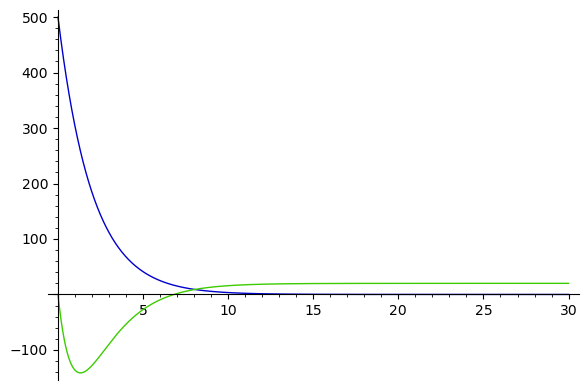

In [37]:
# Atribuindo  valores para as taxas de conversão:
solX, solS = sol[0].rhs(), sol[1].rhs()
plot((solX(mu=0.5, D=1, Y=0.8, Sf=20),solS(mu=0.5, D=1, Y=0.8, Sf=20)),(t,0,30))

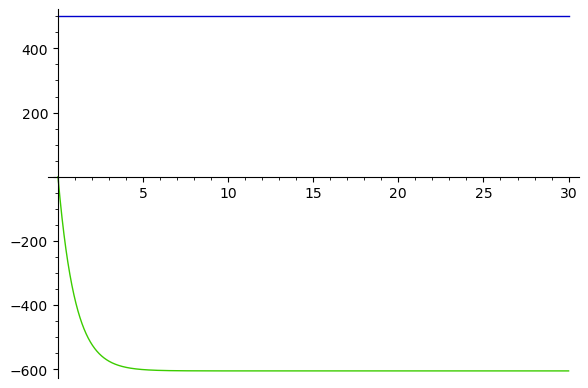

In [38]:
# Atribuindo  valores para as taxas de conversão:
solX, solS = sol[0].rhs(), sol[1].rhs()
plot((solX(mu=1, D=1, Y=0.8, Sf=20),solS(mu=1, D=1, Y=0.8, Sf=20)),(t,0,30))

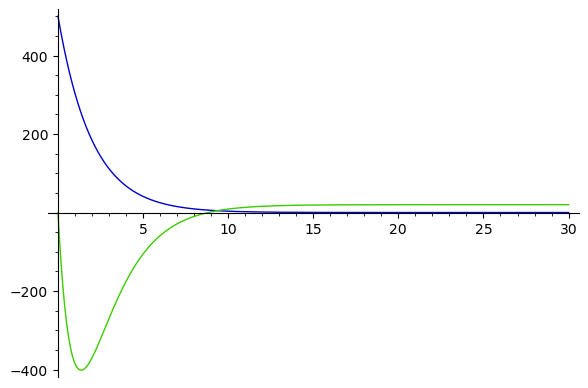

In [39]:
# Atribuindo  valores para as taxas de conversão:
solX, solS = sol[0].rhs(), sol[1].rhs()
plot((solX(mu=0.5, D=1, Y=0.3, Sf=20),solS(mu=0.5, D=1, Y=0.3, Sf=20)),(t,0,30))

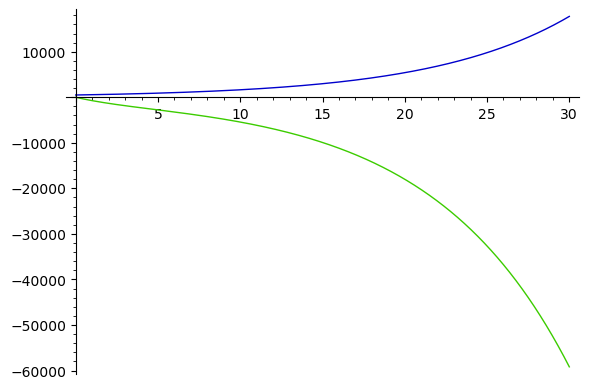

In [40]:
# Atribuindo  valores para as taxas de conversão:
solX, solS = sol[0].rhs(), sol[1].rhs()
plot((solX(mu=0.5, D=0.381, Y=0.3, Sf=1),solS(mu=0.5, D=0.381, Y=0.3, Sf=1)),(t,0,30))

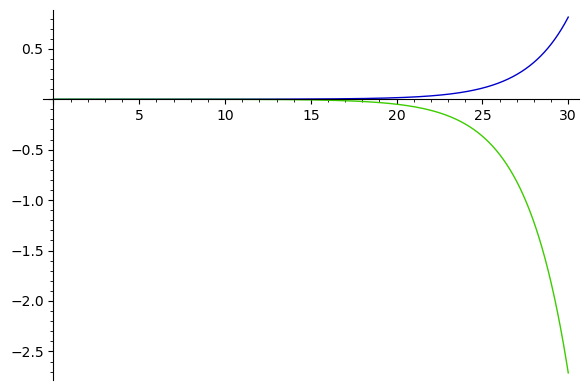

In [41]:
# Atribuindo  valores para as taxas de conversão:
solX, solS = sol[0].rhs(), sol[1].rhs()
plot((solX(mu=0.5, D=0.1, Y=0.3, Sf=1),solS(mu=0.5, D=0.1, Y=0.3, Sf=1)),(t,0,30))

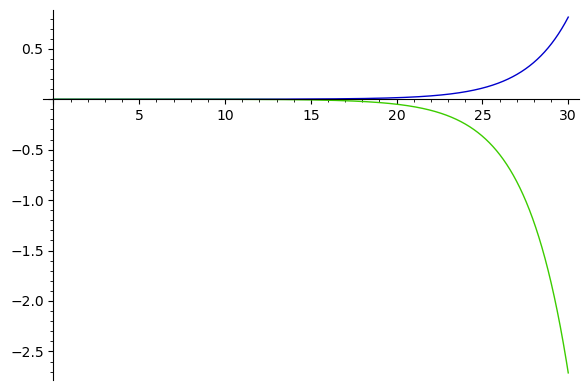

In [42]:
# Atribuindo  valores para as taxas de conversão:
solX, solS = sol[0].rhs(), sol[1].rhs()
plot((solX(mu=0.5, D=0.1, Y=0.3, Sf=10),solS(mu=0.5, D=0.1, Y=0.3, Sf=10)),(t,0,30))

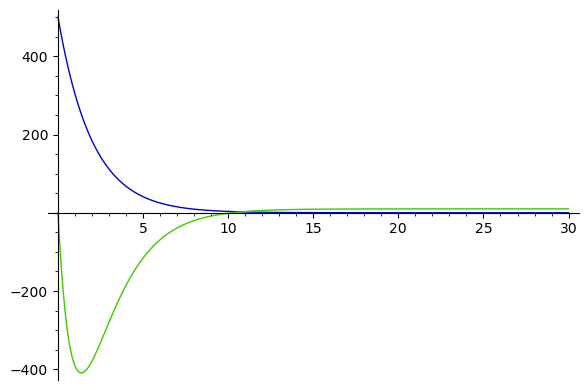

In [43]:
# Atribuindo  valores para as taxas de conversão:
solX, solS = sol[0].rhs(), sol[1].rhs()
plot((solX(mu=0.5, D=1, Y=0.3, Sf=10),solS(mu=0.5, D=1, Y=0.3, Sf=10)),(t,0,30))

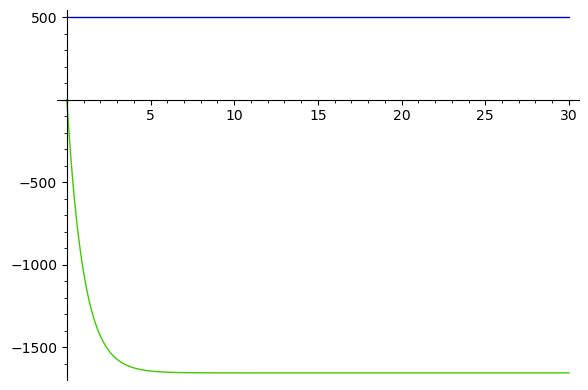

In [44]:
# Atribuindo  valores para as taxas de conversão:
solX, solS = sol[0].rhs(), sol[1].rhs()
plot((solX(mu=1, D=1, Y=0.3, Sf=10),solS(mu=1, D=1, Y=0.3, Sf=10)),(t,0,30))

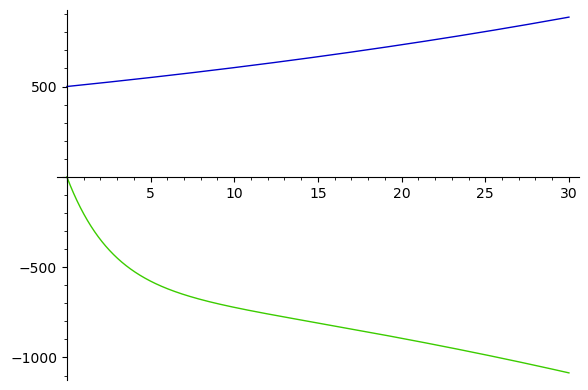

In [45]:
# Atribuindo  valores para as taxas de conversão:
solX, solS = sol[0].rhs(), sol[1].rhs()
plot((solX(mu=0.4, D=0.381, Y=0.8, Sf=20),solS(mu=0.4, D=0.381, Y=0.8, Sf=20)),(t,0,30))

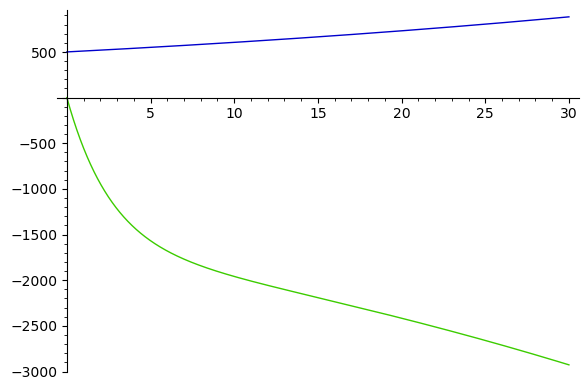

In [46]:
# Atribuindo  valores para as taxas de conversão:
solX, solS = sol[0].rhs(), sol[1].rhs()
plot((solX(mu=0.4, D=0.381, Y=0.3, Sf=20),solS(mu=0.4, D=0.381, Y=0.3, Sf=20)),(t,0,30))

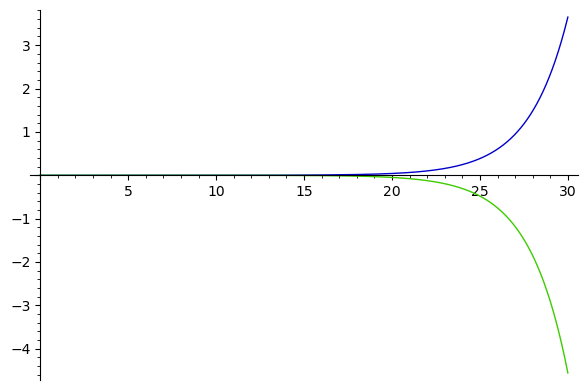

In [47]:
# Atribuindo  valores para as taxas de conversão:
solX, solS = sol[0].rhs(), sol[1].rhs()
plot((solX(mu=1.45, D=1, Y=0.8, Sf=20),solS(mu=1.45, D=1, Y=0.8, Sf=20)),(t,0,30))

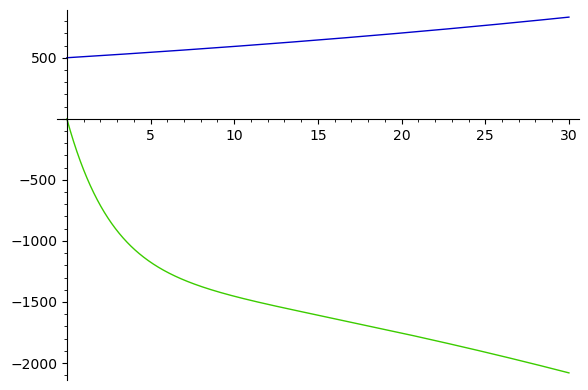

In [48]:
# Atribuindo  valores para as taxas de conversão:
solX, solS = sol[0].rhs(), sol[1].rhs()
plot((solX(mu=0.398, D=0.381, Y=0.4, Sf=1),solS(mu=0.398, D=0.381, Y=0.4, Sf=1)),(t,0,30))

'Raízes=' [s == (D*Sf*Y - X*mu)/(D*Y)]

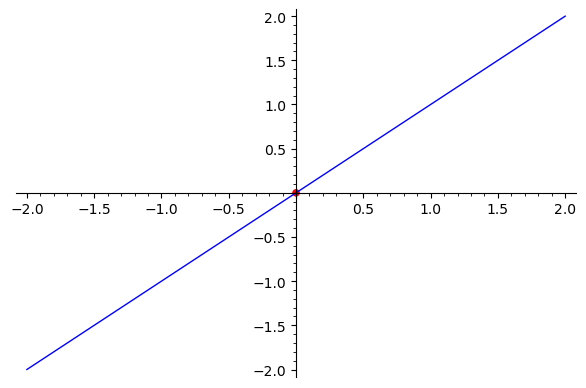

In [49]:
var('mu D Sf X Y')
f(s) = D*Sf - D*s -(mu*X/Y)
raízes = solve(f,s)
show("Raízes=",raízes)
F=plot(s(mu=2, D=1, Sf=20, X=0, Y=0.8),(s,-2,2))
P=points([(0,0)], pointsize=30, color='red')
F+P

'Raízes=' [s == (D*Sf*Y - mu*x)/(D*Y)]

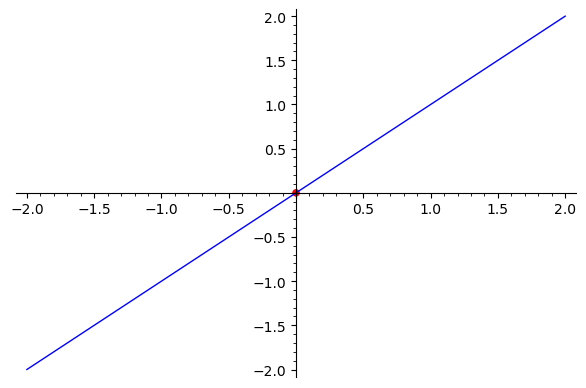

In [50]:
var('mu D Sf Y')
f(s) = D*Sf - D*s -(mu*x/Y)
raízes = solve(f,s)
show("Raízes=",raízes)
F=plot(s(mu=2, D=1, Sf=20, X=0, Y=0.8),(s,-2,2))
P=points([(0,0)], pointsize=30, color='red')
F+P

In [51]:
def fun(t,y):
    x,s = y
    return [Y*(Sf-(Ks*D)/(mumax-D)),
            Ks*D/(mumax-D)]

In [52]:
'''T = ode_solver()
T.algorithm='rk8pd'
T.function = fun
y0=[1,0]
T.ode_solve(t_span=[0,10],y_0=y0, num_points=100)'''

#Verificar como resolver esse problema depois

"T = ode_solver()\nT.algorithm='rk8pd'\nT.function = fun\ny0=[1,0]\nT.ode_solve(t_span=[0,10],y_0=y0, num_points=100)"

In [53]:
var('t x s mu D Sf X Y mumax Ks')

X = function('X')(t)
S = function('S')(t)
de1 = diff(X,t) == mu*X - D*X
de2 = diff(S,t) == D*Sf - D*S -(mu*X/Y)
sol = desolve_system([de1,de2],[X,S],ics=[0,500,0], ivar=t)
show(sol)

[X(t) == 500*e^(-(D - mu)*t),
 S(t) == Sf - (Sf*Y - 500)*e^(-D*t)/Y - 500*e^(-(D - mu)*t)/Y]

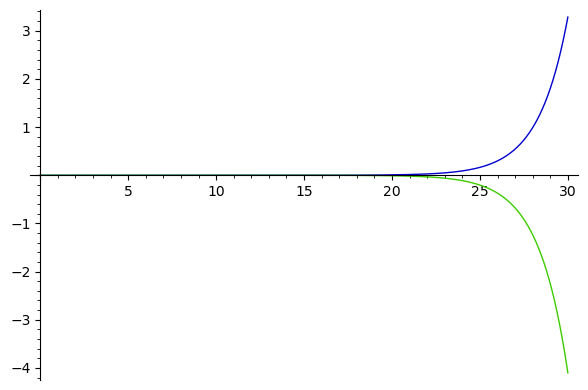

In [54]:
# Atribuindo  valores para as taxas de conversão:
solX, solS = sol[0].rhs(), sol[1].rhs()
plot((solX(mu=1.6, Ks= 1, D=1, Y=0.8, Sf=20),solS(mu=1.6, Ks= 1, D=1, Y=0.8, Sf=20)),(t,0,30))

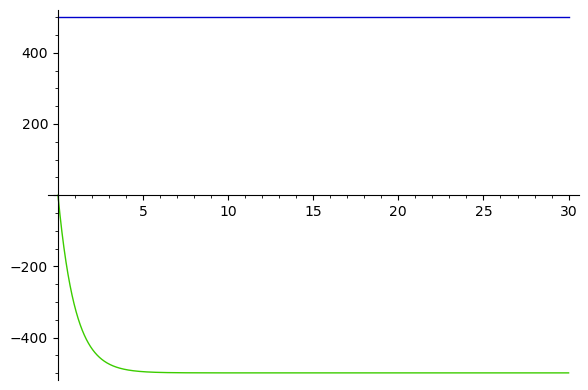

In [55]:
# Atribuindo  valores para as taxas de conversão:
solX, solS = sol[0].rhs(), sol[1].rhs()
plot((solX(mu=1, D=1, Y=1, Sf=1),solS(mu=1, D=1, Y=1, Sf=1)),(t,0,30))

*-----------------------------------------------------------------------------------------------------*

As equações de soluções de estado estacionário são as seguintes:

S = KsD/(mumax-D)

X = Y(Sf- KsD/(mumax-D))

mu = mumax.S/(Ks+S)

In [56]:
mumax = 1.6
Ks = 1
Y = 0.8
Sf = 20
D = 1

In [57]:
S = Ks*D/(mumax-D)
print(S)

1.66666666666667


In [58]:
X = Y*(Sf- Ks*D/(mumax-D))
print(X)

14.6666666666667


In [59]:
mu = mumax*S/(Ks+S)
print(mu)

1.00000000000000


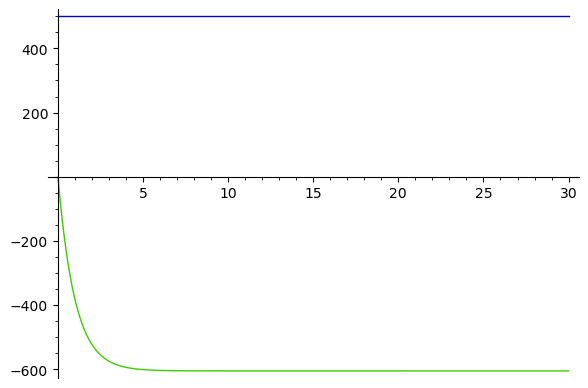

In [60]:
# Atribuindo  valores para as taxas de conversão:
solX, solS = sol[0].rhs(), sol[1].rhs()
plot((solX(mu=1, D=1, Y=0.8, Sf=20),solS(mu=1, D=1, Y=0.8, Sf=20)),(t,0,30))

In [61]:
var('x s mu D Sf X S mumax Ks')

mu=mumax*S/(Ks + S)

X = function('X')(t)
S = function('S')(t)
de1 = diff(X,t) == mu*X - D*X
de2 = diff(S,t) == D*Sf - D*S -(mu*X/Y)
sol = desolve_system([de1,de2],[X,S],ics=[0,500,0], ivar=t)
show(sol)

[X(t) == 500*e^(-(D*Ks + D*S - S*mumax)*t/(Ks + S)),
 S(t) == -(Sf - 625)*e^(-D*t) + Sf - 625*e^(-(D*Ks + D*S - S*mumax)*t/(Ks + S))]

In [62]:
# Atribuindo  valores para as taxas de conversão:
solX, solS = sol[0].rhs(), sol[1].rhs()
plot((solX(mumax=1.6, Ks= 1, D=1, Y=0.8, Sf=20),solS(mumax=1.6, Ks= 1, D=1, Y=0.8, Sf=20)),(t,0,30))

ValueError: Variable 'S' not found

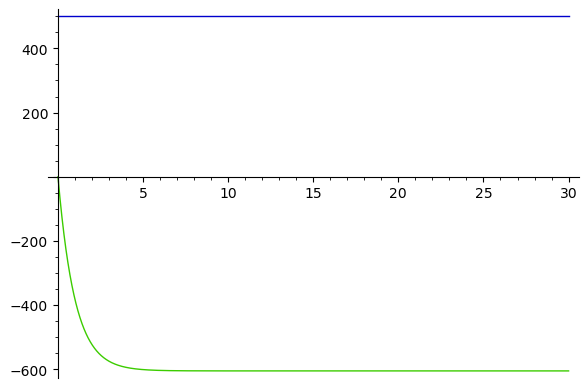

In [63]:
# Atribuindo  valores para as taxas de conversão:
solX, solS = sol[0].rhs(), sol[1].rhs()
plot((solX(mumax=1.6, Ks= 1, D=1, Y=0.8, Sf=20, S=1.66666666666667),solS(mumax=1.6, Ks= 1, D=1, Y=0.8, Sf=20, S=1.66666666666667)),(t,0,30))

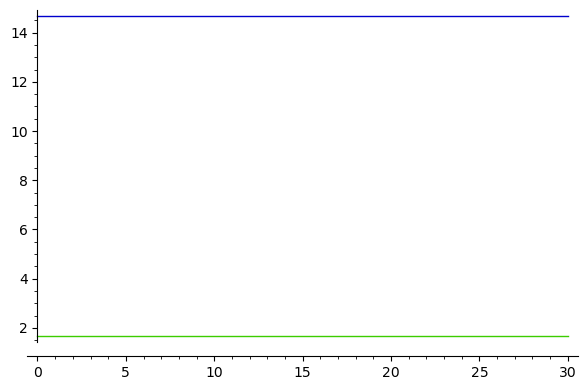

In [64]:
mumax=1.6
Ks= 1
D=1
Y=0.8
Sf=20
S=1.66666666666667

plot((Y*(Sf- Ks*D/(mumax-D)), Ks*D/(mumax-D)),(t,0,30))

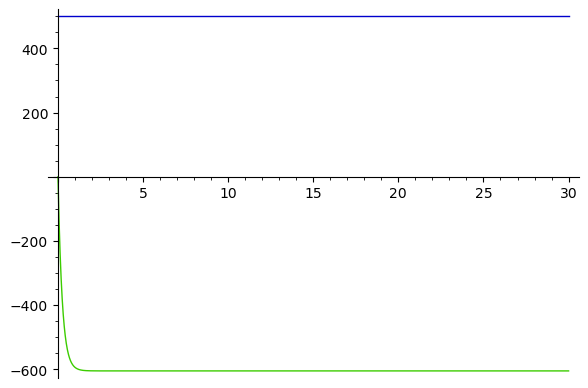

In [65]:
# Atribuindo  valores para as taxas de conversão:
solX, solS = sol[0].rhs(), sol[1].rhs()
plot((solX(mumax=6, Ks= 1, D=4, Y=0.8, Sf=20, S=2),solS(mumax=6, Ks= 1, D=4, Y=0.8, Sf=20, S=2)),(t,0,30))

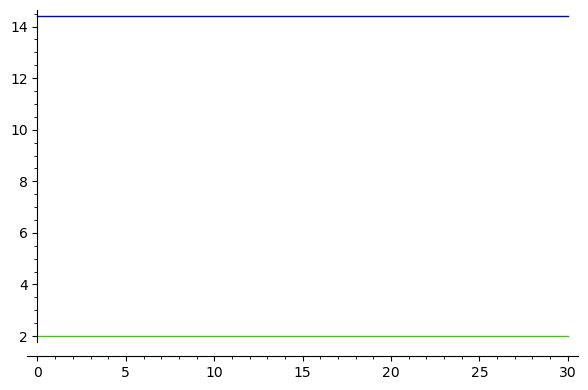

In [66]:
mumax=6
Ks= 1
D=4
Y=0.8
Sf=20
S=2

plot((Y*(Sf- Ks*D/(mumax-D)), Ks*D/(mumax-D)),(t,0,30))

Simulação:

In [67]:
import numpy as np
import pandas as pd
%display typeset

In [68]:
def model(t, y, params):
    X, S = y
    mu, D, Sf, Y, mumax, Ks = params
    return [
        mu*X - D*X, #dX/dt
        D*Sf - D*S -(mu*X/Y) # dS/dt
    ]

In [69]:
mumax=6
Ks= 1
D=4
Y=0.8
Sf=20
mu = mumax*S/(Ks+S)

In [70]:
T = ode_solver()
T.function = model
T.algorithm='rk8pd'
inits = [0.05, 10.0]
tspan = [0,100]
T.ode_solve(tspan, inits, num_points=200, params=[mu, D, Sf, Y, mumax, Ks])

In [71]:
def get_sim_array(sol):
    sim = np.array([y for t,y in sol])
    return sim
get_sim_array(T.solution)

array([[ 0.05      , 10.        ],
       [ 0.05      , 18.59260562],
       [ 0.05      , 19.75548834],
       [ 0.05      , 19.9128674 ],
       [ 0.05      , 19.93416634],
       [ 0.05      , 19.93704884],
       [ 0.05      , 19.93743894],
       [ 0.05      , 19.93749174],
       [ 0.05      , 19.93749888],
       [ 0.05      , 19.93749985],
       [ 0.05      , 19.93749998],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0

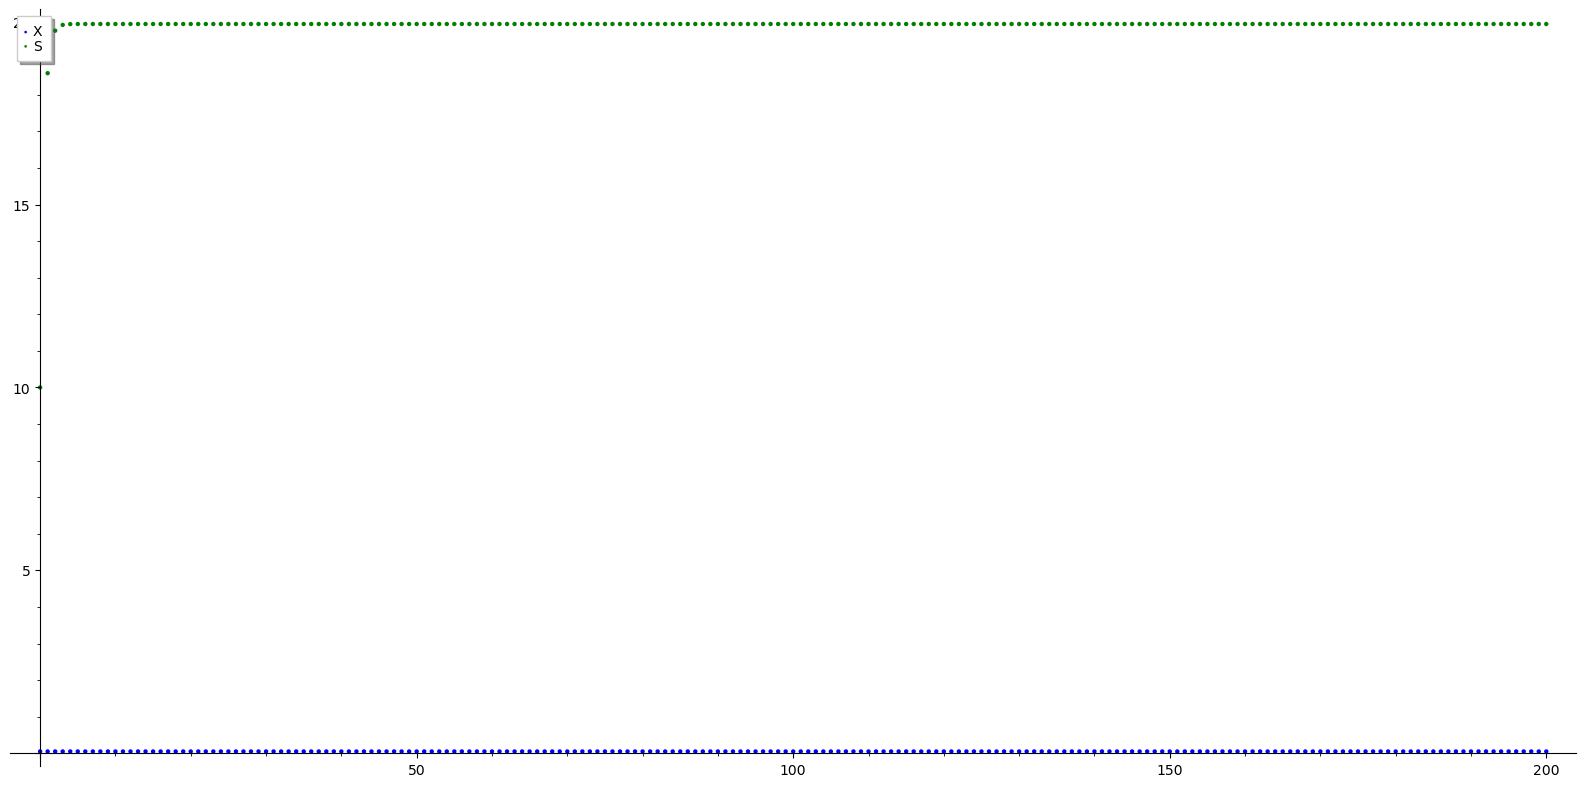

In [72]:
def plot_sol(sol):
    sim = get_sim_array(sol)
    P = list_plot(sim[:,0],legend_label='X')
    colors = ['blue','green']
    for i,var in enumerate(['S']):
        P += list_plot(sim[:,i+1],color=colors[i+1],legend_label=var)
   
    show(P, figsize=(16, 8))
plot_sol(T.solution)

In [73]:
T = ode_solver()
T.function = model
T.algorithm='rk8pd'
inits = [14.6666666666667, 1.66666666666667]
tspan = [0,100]
T.ode_solve(tspan, inits, num_points=200, params=[mu, D, Sf, Y, mumax, Ks])

In [74]:
def get_sim_array(sol):
    sim = np.array([y for t,y in sol])
    return sim
get_sim_array(T.solution)

array([[14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14

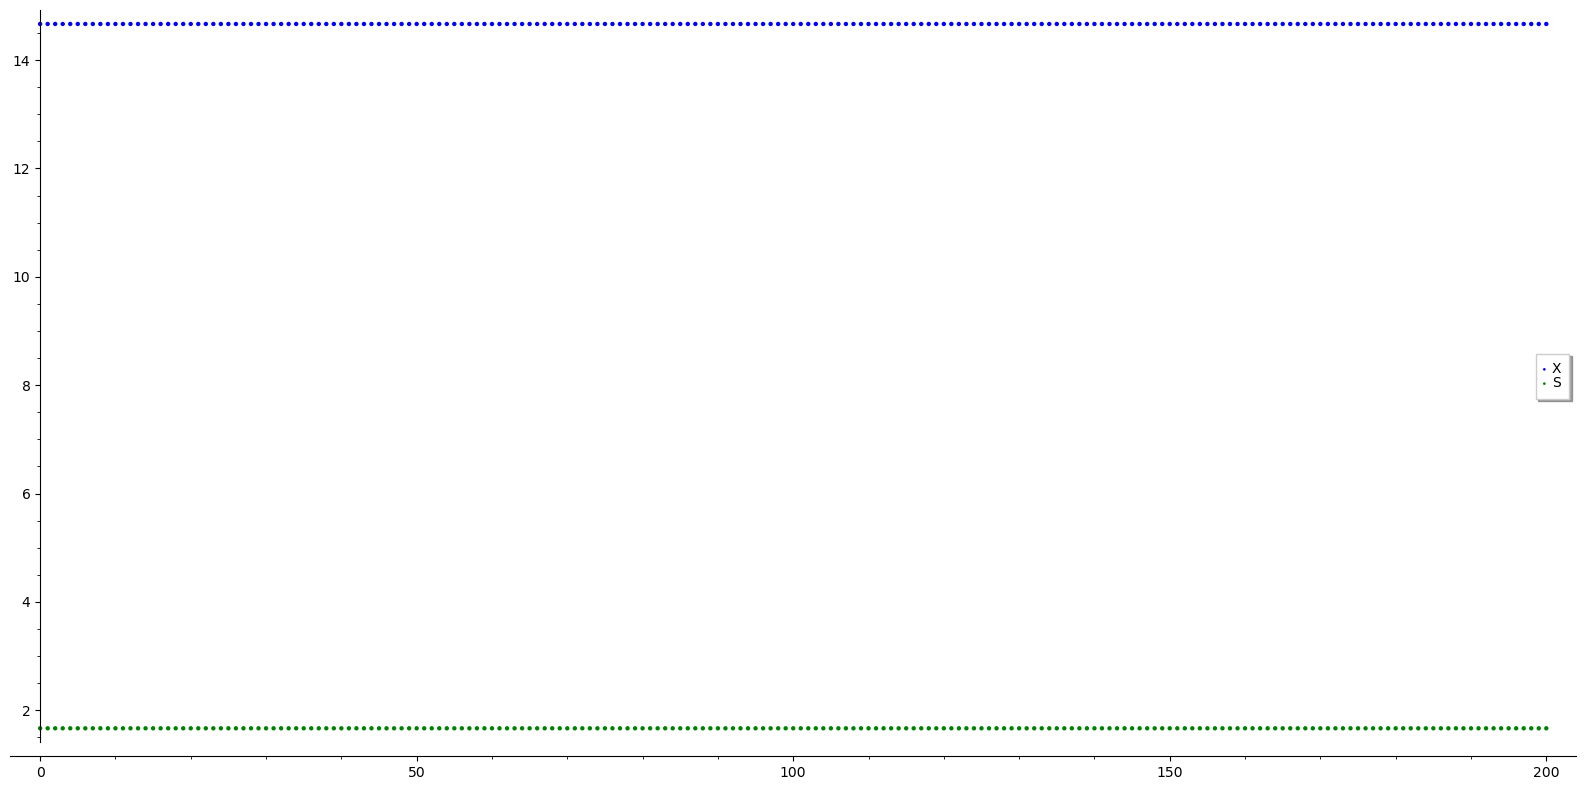

In [75]:
def plot_sol(sol):
    sim = get_sim_array(sol)
    P = list_plot(sim[:,0],legend_label='X')
    colors = ['blue','green']
    for i,var in enumerate(['S']):
        P += list_plot(sim[:,i+1],color=colors[i+1],legend_label=var)
   
    show(P, figsize=(16, 8))
plot_sol(T.solution)

In [76]:
T = ode_solver()
T.function = model
T.algorithm='rk8pd'
inits = [1, 1]
tspan = [0,100]
T.ode_solve(tspan, inits, num_points=200, params=[mu, D, Sf, Y, mumax, Ks])

In [77]:
def get_sim_array(sol):
    sim = np.array([y for t,y in sol])
    return sim
get_sim_array(T.solution)

array([[ 1.        ,  1.        ],
       [ 1.        , 16.34779872],
       [ 1.        , 18.42489741],
       [ 1.        , 18.70600215],
       [ 1.        , 18.74404554],
       [ 1.        , 18.74919415],
       [ 1.        , 18.74989094],
       [ 1.        , 18.74998524],
       [ 1.        , 18.749998  ],
       [ 1.        , 18.74999973],
       [ 1.        , 18.74999996],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1

**Observação: a concentração de células (X) não evolui porque, no cálculo acima, mu=D, e consequentemente X não irá evoluir**

In [78]:
mumax = 1.6   
Ks = 1.00     
Y = 0.8     
Sf = 20.0    
D = 1.00
mu = mumax*S/(Ks+S)

In [92]:
T = ode_solver()
T.function = model
T.algorithm='rk8pd'
inits = [0.05, 10]
tspan = [0,80]
T.ode_solve(tspan, inits, num_points=200, params=[mu, D, Sf, Y, mumax, Ks])

In [93]:
def get_sim_array(sol):
    sim = np.array([y for t,y in sol])
    return sim
get_sim_array(T.solution)

array([[ 0.05      , 10.        ],
       [ 0.05135127, 13.27450545],
       [ 0.05273906, 15.4688696 ],
       [ 0.05416435, 16.93917708],
       [ 0.05562817, 17.92411814],
       [ 0.05713154, 18.5836912 ],
       [ 0.05867554, 19.02514591],
       [ 0.06026127, 19.32037341],
       [ 0.06188986, 19.51756327],
       [ 0.06356246, 19.64901744],
       [ 0.06528026, 19.73638802],
       [ 0.06704448, 19.79418833],
       [ 0.06885639, 19.8321464 ],
       [ 0.07071726, 19.85678257],
       [ 0.07262842, 19.87246695],
       [ 0.07459123, 19.88212836],
       [ 0.07660709, 19.88772941],
       [ 0.07867743, 19.89058507],
       [ 0.08080372, 19.89157615],
       [ 0.08298747, 19.89129242],
       [ 0.08523024, 19.89012854],
       [ 0.08753363, 19.88834835],
       [ 0.08989926, 19.88612802],
       [ 0.09232882, 19.8835849 ],
       [ 0.09482404, 19.88079689],
       [ 0.0973867 , 19.87781546],
       [ 0.10001862, 19.87467431],
       [ 0.10272166, 19.8713952 ],
       [ 0.10549775, 19.86799192],
       [ 0.10834887, 19.86447282],
       [ 0.11127705, 19.86084263],
       [ 0.11428435, 19.85710363],
       [ 0.11737293, 19.8532564 ],
       [ 0.12054499, 19.84930038],
       [ 0.12380276, 19.84523422],
       [ 0.12714858, 19.84105601],
       [ 0.13058482, 19.83676343],
       [ 0.13411393, 19.83235387],
       [ 0.13773841, 19.82782449],
       [ 0.14146085, 19.82317227],
       [ 0.14528389, 19.81839402],
       [ 0.14921024, 19.81348645],
       [ 0.15324271, 19.80844611],
       [ 0.15738416, 19.80326947],
       [ 0.16163753, 19.79795287],
       [ 0.16600585, 19.79249254],
       [ 0.17049222, 19.78688462],
       [ 0.17509984, 19.78112513],
       [ 0.17983199, 19.77520997],
       [ 0.18469202, 19.76913495],
       [ 0.18968339, 19.76289574],
       [ 0.19480967, 19.7564879 ],
       [ 0.20007447, 19.7499069 ],
       [ 0.20548157, 19.74314803],
       [ 0.21103479, 19.73620651],
       [ 0.21673809, 19.72907738],
       [ 0.22259553, 19.72175559],
       [ 0.22861126, 19.71423592],
       [ 0.23478957, 19.70651303],
       [ 0.24113485, 19.69858143],
       [ 0.24765162, 19.69043547],
       [ 0.25434451, 19.68206937],
       [ 0.26121827, 19.67347716],
       [ 0.2682778 , 19.66465275],
       [ 0.27552811, 19.65558986],
       [ 0.28297437, 19.64628203],
       [ 0.29062187, 19.63672266],
       [ 0.29847604, 19.62690495],
       [ 0.30654248, 19.6168219 ],
       [ 0.31482691, 19.60646636],
       [ 0.32333524, 19.59583095],
       [ 0.3320735 , 19.58490812],
       [ 0.34104792, 19.5736901 ],
       [ 0.35026488, 19.5621689 ],
       [ 0.35973093, 19.55033634],
       [ 0.3694528 , 19.53818399],
       [ 0.37943742, 19.52570323],
       [ 0.38969187, 19.51288517],
       [ 0.40022345, 19.49972069],
       [ 0.41103965, 19.48620044],
       [ 0.42214816, 19.4723148 ],
       [ 0.43355688, 19.4580539 ],
       [ 0.44527393, 19.44340758],
       [ 0.45730764, 19.42836545],
       [ 0.46966656, 19.41291679],
       [ 0.48235949, 19.39705063],
       [ 0.49539545, 19.38075568],
       [ 0.50878372, 19.36402036],
       [ 0.5225338 , 19.34683275],
       [ 0.53665549, 19.32918064],
       [ 0.55115882, 19.31105148],
       [ 0.56605411, 19.29243236],
       [ 0.58135195, 19.27331006],
       [ 0.59706322, 19.25367097],
       [ 0.6131991 , 19.23350113],
       [ 0.62977105, 19.21278619],
       [ 0.64679087, 19.19151142],
       [ 0.66427065, 19.16966169],
       [ 0.68222283, 19.14722146],
       [ 0.70066018, 19.12417477],
       [ 0.7195958 , 19.10050524],
       [ 0.73904317, 19.07619603],
       [ 0.75901611, 19.05122986],
       [ 0.77952883, 19.02558896],
       [ 0.80059591, 18.99925511],
       [ 0.82223234, 18.97220958],
       [ 0.8444535 , 18.94443313],
       [ 0.8672752 , 18.915906  ],
       [ 0.89071366, 18.88660793],
       [ 0.91478556, 18.85651806],
       [ 0.939508  , 18.82561499],
       [ 0.96489859, 18.79387677],
       [ 0.99097536, 18.7612808 ],
       [ 1.01775687, 18.72780391],
       [ 1

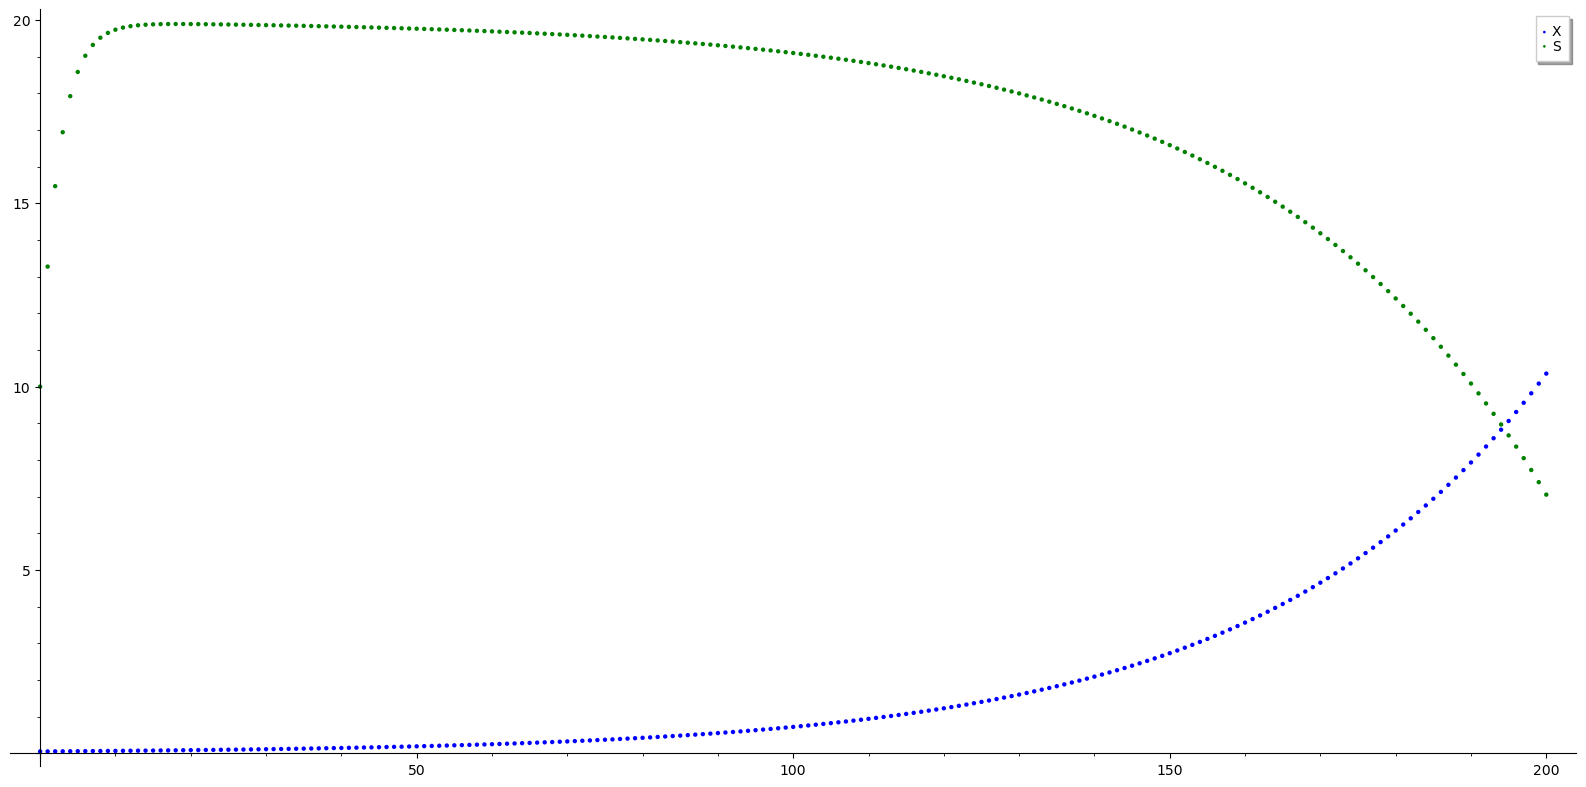

In [94]:
def plot_sol(sol):
    sim = get_sim_array(sol)
    P = list_plot(sim[:,0],legend_label='X')
    colors = ['blue','green']
    for i,var in enumerate(['S']):
        P += list_plot(sim[:,i+1],color=colors[i+1],legend_label=var)
   
    show(P, figsize=(16, 8))
plot_sol(T.solution)

In [82]:
mumax = 1.6   
Ks = 1.00     
Y = 0.3    
Sf = 20.0     
D = 1.00
mu = mumax*S/(Ks+S)

In [83]:
T = ode_solver()
T.function = model
T.algorithm='rk8pd'
inits = [0.05, 10]
tspan = [0,75]
T.ode_solve(tspan, inits, num_points=200, params=[mu, D, Sf, Y, mumax, Ks])

In [84]:
def get_sim_array(sol):
    sim = np.array([y for t,y in sol])
    return sim
get_sim_array(T.solution)

array([[ 0.05      , 10.        ],
       [ 0.05126576, 13.07076957],
       [ 0.05256355, 15.17985038],
       [ 0.05389421, 16.62793671],
       [ 0.05525855, 17.62169161],
       [ 0.05665742, 18.30315142],
       [ 0.05809171, 18.76993525],
       [ 0.05956231, 19.08913469],
       [ 0.06107014, 19.30686003],
       [ 0.06261614, 19.45480138],
       [ 0.06420127, 19.55473793],
       [ 0.06582653, 19.62163719],
       [ 0.06749294, 19.66578507],
       [ 0.06920153, 19.6942498 ],
       [ 0.07095338, 19.71188814],
       [ 0.07274957, 19.72203689],
       [ 0.07459123, 19.72698815],
       [ 0.07647952, 19.728316  ],
       [ 0.07841561, 19.72710099],
       [ 0.08040071, 19.72408443],
       [ 0.08243606, 19.71977446],
       [ 0.08452294, 19.71451892],
       [ 0.08666265, 19.70855545],
       [ 0.08885653, 19.7020459 ],
       [ 0.09110594, 19.6951    ],
       [ 0.0934123 , 19.68779163],
       [ 0.09577704, 19.68016996],
       [ 0.09820165, 19.6722672 ],
       [ 0.10068764, 19.66410377],
       [ 0.10323655, 19.65569205],
       [ 0.10585   , 19.64703876],
       [ 0.10852961, 19.63814674],
       [ 0.11127705, 19.62901609],
       [ 0.11409404, 19.61964501],
       [ 0.11698234, 19.61003032],
       [ 0.11994376, 19.60016784],
       [ 0.12298016, 19.59005267],
       [ 0.12609341, 19.57967936],
       [ 0.12928548, 19.56904202],
       [ 0.13255836, 19.55813442],
       [ 0.13591409, 19.54695002],
       [ 0.13935477, 19.53548202],
       [ 0.14288256, 19.52372339],
       [ 0.14649965, 19.51166687],
       [ 0.1502083 , 19.49930499],
       [ 0.15401084, 19.48663006],
       [ 0.15790965, 19.4736342 ],
       [ 0.16190715, 19.46030929],
       [ 0.16600585, 19.44664703],
       [ 0.1702083 , 19.43263888],
       [ 0.17451715, 19.4182761 ],
       [ 0.17893507, 19.40354972],
       [ 0.18346483, 19.38845052],
       [ 0.18810927, 19.37296908],
       [ 0.19287128, 19.35709573],
       [ 0.19775384, 19.34082054],
       [ 0.20276   , 19.32413333],
       [ 0.20789289, 19.30702369],
       [ 0.21315573, 19.28948091],
       [ 0.21855179, 19.27149404],
       [ 0.22408445, 19.25305182],
       [ 0.22975718, 19.23414274],
       [ 0.23557351, 19.21475497],
       [ 0.24153708, 19.1948764 ],
       [ 0.24765162, 19.1744946 ],
       [ 0.25392095, 19.15359683],
       [ 0.26034899, 19.13217003],
       [ 0.26693976, 19.11020081],
       [ 0.27369737, 19.08767543],
       [ 0.28062605, 19.06457983],
       [ 0.28773013, 19.04089955],
       [ 0.29501406, 19.01661981],
       [ 0.30248237, 18.99172542],
       [ 0.31013975, 18.96620083],
       [ 0.31799098, 18.94003008],
       [ 0.32604096, 18.91319681],
       [ 0.33429472, 18.88568426],
       [ 0.34275743, 18.85747522],
       [ 0.35143438, 18.82855207],
       [ 0.36033098, 18.79889672],
       [ 0.3694528 , 18.76849065],
       [ 0.37880555, 18.73731484],
       [ 0.38839506, 18.70534982],
       [ 0.39822732, 18.67257559],
       [ 0.4083085 , 18.63897168],
       [ 0.41864487, 18.60451709],
       [ 0.42924292, 18.56919027],
       [ 0.44010926, 18.53296915],
       [ 0.45125067, 18.49583108],
       [ 0.46267414, 18.45775287],
       [ 0.47438679, 18.41871069],
       [ 0.48639595, 18.37868016],
       [ 0.49870912, 18.33763626],
       [ 0.511334  , 18.29555332],
       [ 0.52427849, 18.25240505],
       [ 0.53755066, 18.20816447],
       [ 0.55115882, 18.16280394],
       [ 0.56511147, 18.1162951 ],
       [ 0.57941734, 18.06860888],
       [ 0.59408536, 18.01971548],
       [ 0.6091247 , 17.96958434],
       [ 0.62454476, 17.91818412],
       [ 0.64035519, 17.8654827 ],
       [ 0.65656586, 17.81144714],
       [ 0.6731869 , 17.75604366],
       [ 0.69022871, 17.69923764],
       [ 0.70770193, 17.64099356],
       [ 0.72561749, 17.58127503],
       [ 0.74398659, 17.52004471],
       [ 0.7628207 , 17.45726435],
       [ 0.78213159, 17.39289469],
       [ 0.80193135, 17.3268955 ],
       [ 0.82223234, 17.25922554],
       [ 0.84304725, 17.1898425 ],
       [ 0

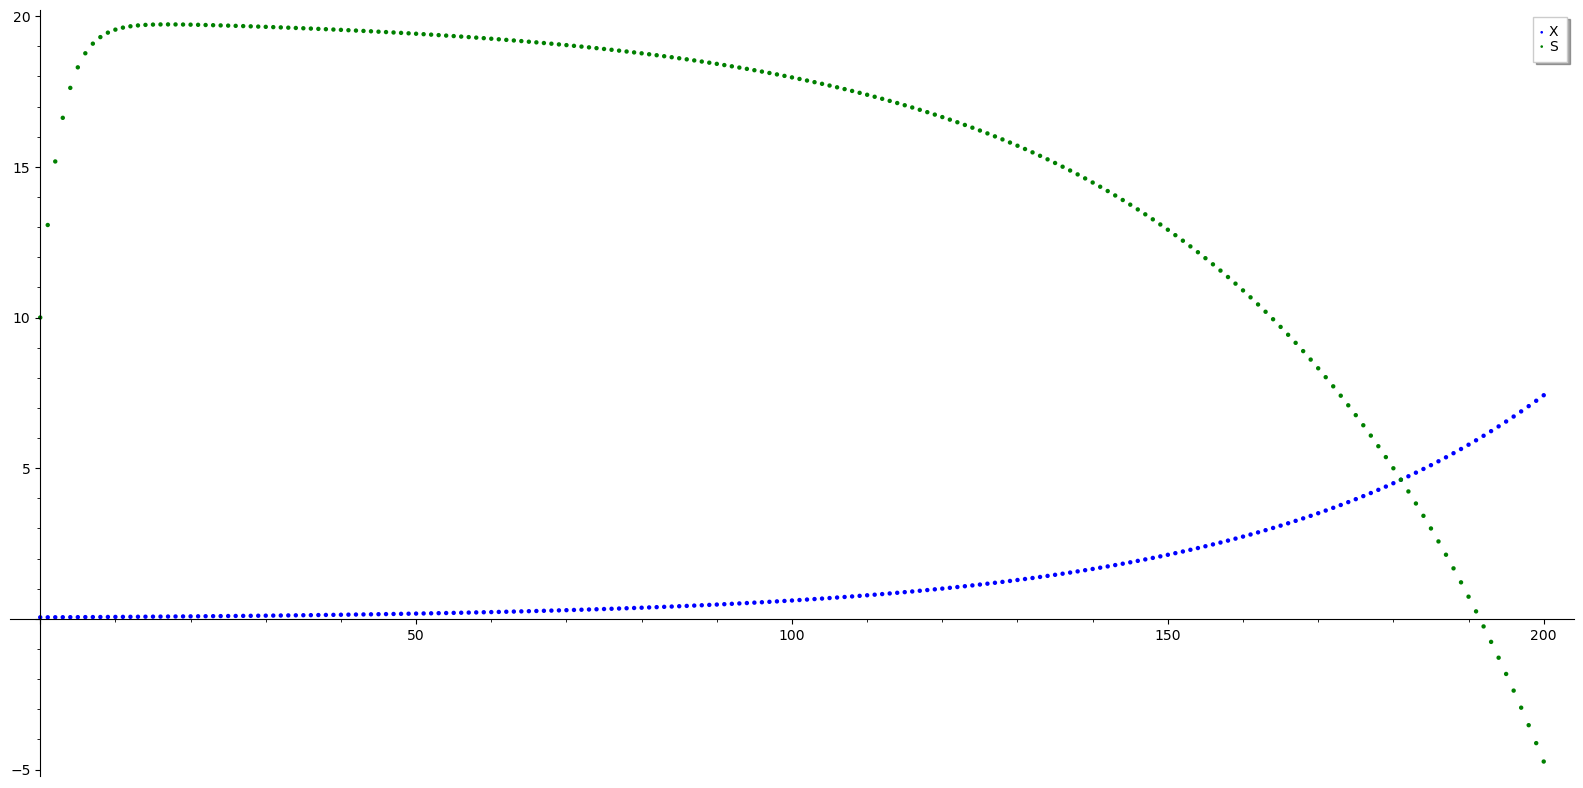

In [85]:
def plot_sol(sol):
    sim = get_sim_array(sol)
    P = list_plot(sim[:,0],legend_label='X')
    colors = ['blue','green']
    for i,var in enumerate(['S']):
        P += list_plot(sim[:,i+1],color=colors[i+1],legend_label=var)
   
    show(P, figsize=(16, 8))
plot_sol(T.solution)

In [86]:
mumax = 1.6
Ks = 1.0
D = 1.0
Y = 0.8
Sf = 20.0
mu = mumax*S/(Ks+S) 

In [89]:
T = ode_solver()
T.function = model
T.algorithm='rk8pd'
inits = [14.6666666666667, 1.66666666666667]
tspan = [0,100]
T.ode_solve(tspan, inits, num_points=200, params=[mu, D, Sf, Y, mumax, Ks])

In [90]:
def get_sim_array(sol):
    sim = np.array([y for t,y in sol])
    return sim
get_sim_array(T.solution)

array([[ 1.46666667e+01,  1.66666667e+00],
       [ 1.51637950e+01,  1.04525625e+00],
       [ 1.56777736e+01,  4.02783061e-01],
       [ 1.62091735e+01, -2.61466831e-01],
       [ 1.67585852e+01, -9.48231550e-01],
       [ 1.73266194e+01, -1.65827424e+00],
       [ 1.79139071e+01, -2.39238390e+00],
       [ 1.85211010e+01, -3.15137629e+00],
       [ 1.91488759e+01, -3.93609482e+00],
       [ 1.97979292e+01, -4.74741147e+00],
       [ 2.04689822e+01, -5.58622779e+00],
       [ 2.11627807e+01, -6.45347589e+00],
       [ 2.18800956e+01, -7.35011946e+00],
       [ 2.26217239e+01, -8.27715486e+00],
       [ 2.33884898e+01, -9.23561223e+00],
       [ 2.41812453e+01, -1.02265566e+01],
       [ 2.50008714e+01, -1.12510892e+01],
       [ 2.58482787e+01, -1.23103484e+01],
       [ 2.67244091e+01, -1.34055113e+01],
       [ 2.76302360e+01, -1.45377949e+01],
       [ 2.85667659e+01, -1.57084574e+01],
       [ 2.95350397e+01, -1.69187996e+01],
       [ 3.05361332e+01, -1.81701665e+01],
       [ 3.15711589e+01, -1.94639487e+01],
       [ 3.26412670e+01, -2.08015837e+01],
       [ 3.37476464e+01, -2.21845580e+01],
       [ 3.48915267e+01, -2.36144084e+01],
       [ 3.60741790e+01, -2.50927237e+01],
       [ 3.72969174e+01, -2.66211467e+01],
       [ 3.85611006e+01, -2.82013758e+01],
       [ 3.98681335e+01, -2.98351669e+01],
       [ 4.12194684e+01, -3.15243355e+01],
       [ 4.26166070e+01, -3.32707587e+01],
       [ 4.40611017e+01, -3.50763771e+01],
       [ 4.55545577e+01, -3.69431972e+01],
       [ 4.70986346e+01, -3.88732933e+01],
       [ 4.86950482e+01, -4.08688103e+01],
       [ 5.03455724e+01, -4.29319655e+01],
       [ 5.20520413e+01, -4.50650516e+01],
       [ 5.38163511e+01, -4.72704389e+01],
       [ 5.56404625e+01, -4.95505781e+01],
       [ 5.75264022e+01, -5.19080028e+01],
       [ 5.94762662e+01, -5.43453327e+01],
       [ 6.14922210e+01, -5.68652762e+01],
       [ 6.35765068e+01, -5.94706335e+01],
       [ 6.57314397e+01, -6.21642996e+01],
       [ 6.79594143e+01, -6.49492679e+01],
       [ 7.02629064e+01, -6.78286330e+01],
       [ 7.26444756e+01, -7.08055944e+01],
       [ 7.51067683e+01, -7.38834604e+01],
       [ 7.76525207e+01, -7.70656509e+01],
       [ 8.02845617e+01, -8.03557022e+01],
       [ 8.30058161e+01, -8.37572701e+01],
       [ 8.58193076e+01, -8.72741345e+01],
       [ 8.87281628e+01, -9.09102035e+01],
       [ 9.17356140e+01, -9.46695175e+01],
       [ 9.48450030e+01, -9.85562538e+01],
       [ 9.80597852e+01, -1.02574731e+02],
       [ 1.01383533e+02, -1.06729416e+02],
       [ 1.04819939e+02, -1.11024924e+02],
       [ 1.08372823e+02, -1.15466028e+02],
       [ 1.12046132e+02, -1.20057665e+02],
       [ 1.15843948e+02, -1.24804935e+02],
       [ 1.19770492e+02, -1.29713115e+02],
       [ 1.23830126e+02, -1.34787658e+02],
       [ 1.28027363e+02, -1.40034203e+02],
       [ 1.32366865e+02, -1.45458581e+02],
       [ 1.36853455e+02, -1.51066818e+02],
       [ 1.41492118e+02, -1.56865147e+02],
       [ 1.46288009e+02, -1.62860012e+02],
       [ 1.51246458e+02, -1.69058073e+02],
       [ 1.56372974e+02, -1.75466217e+02],
       [ 1.61673254e+02, -1.82091567e+02],
       [ 1.67153187e+02, -1.88941484e+02],
       [ 1.72818863e+02, -1.96023579e+02],
       [ 1.78676578e+02, -2.03345723e+02],
       [ 1.84732841e+02, -2.10916051e+02],
       [ 1.90994382e+02, -2.18742977e+02],
       [ 1.97468158e+02, -2.26835197e+02],
       [ 2.04161363e+02, -2.35201704e+02],
       [ 2.11081436e+02, -2.43851795e+02],
       [ 2.18236065e+02, -2.52795082e+02],
       [ 2.25633202e+02, -2.62041502e+02],
       [ 2.33281064e+02, -2.71601331e+02],
       [ 2.41188153e+02, -2.81485191e+02],
       [ 2.49363252e+02, -2.91704066e+02],
       [ 2.57815448e+02, -3.02269310e+02],
       [ 2.66554132e+02, -3.13192665e+02],
       [ 2.75589015e+02, -3.24486268e+02],
       [ 2.84930136e+02, -3.36162669e+02],
       [ 2.94587875e+02, -3.48234844e+02],
       [ 3.04572964e+02, -3.60716205e+02],
       [ 3.14896500e+02, -3.73620624e+02],
 

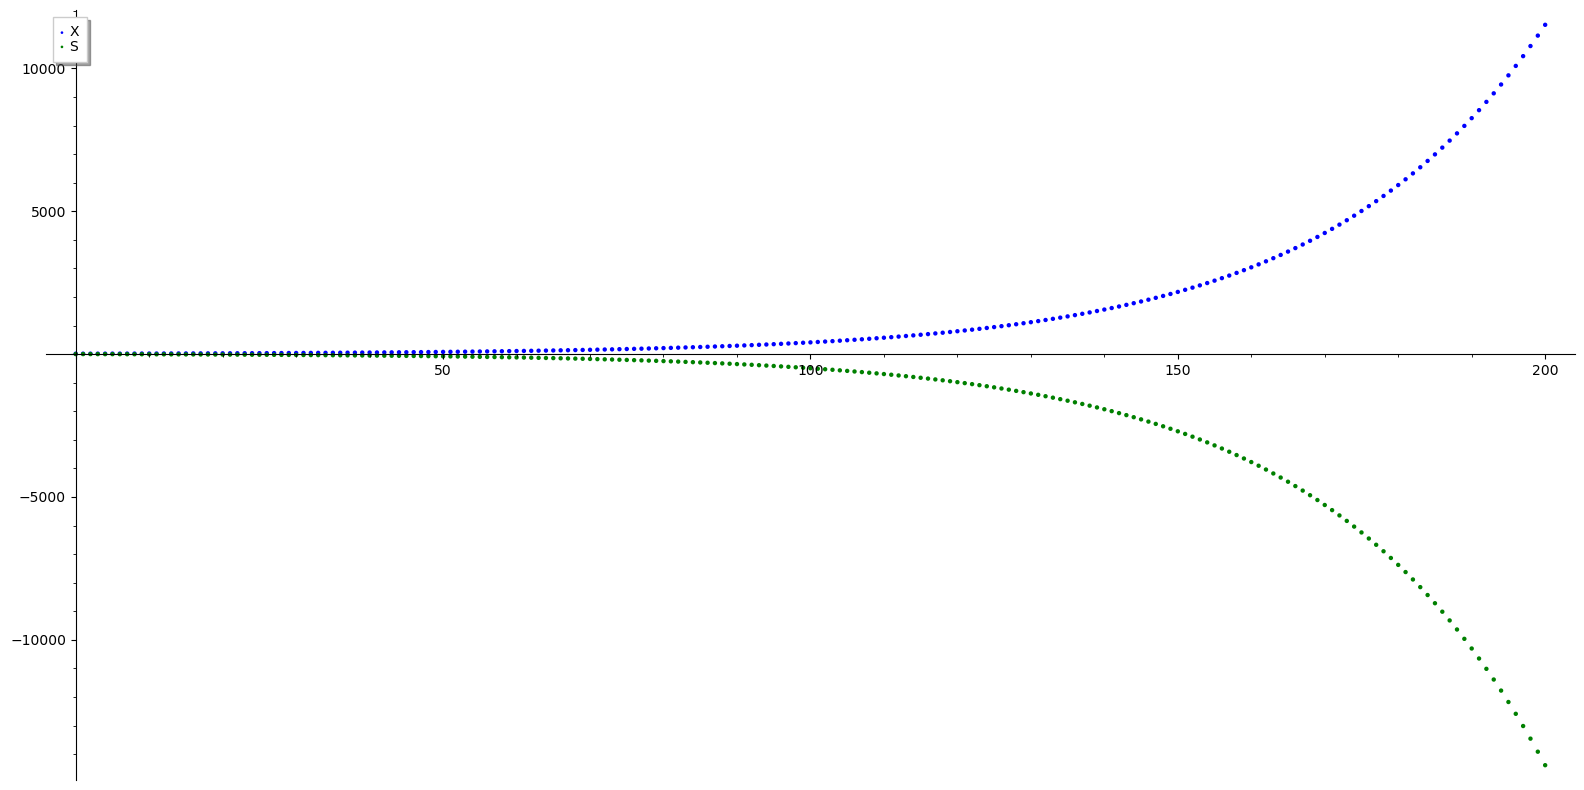

In [91]:
def plot_sol(sol):
    sim = get_sim_array(sol)
    P = list_plot(sim[:,0],legend_label='X')
    colors = ['blue','green']
    for i,var in enumerate(['S']):
        P += list_plot(sim[:,i+1],color=colors[i+1],legend_label=var)
   
    show(P, figsize=(16, 8))
plot_sol(T.solution)

Note que, nesse caso, a concentração de substrato diminuirá rapidamente, já que é pelo menos 10 vezes menor que a concentração de células

In [101]:
T = ode_solver()
T.function = model
T.algorithm='rk8pd'
inits = [0.5, 5.0]
tspan = [0,100]
T.ode_solve(tspan, inits, num_points=200, params=[mu, D, Sf, Y, mumax, Ks])

In [102]:
def get_sim_array(sol):
    sim = np.array([y for t,y in sol])
    return sim
get_sim_array(T.solution)

array([[ 5.00000000e-01,  5.00000000e+00],
       [ 5.16947557e-01,  1.06349373e+01],
       [ 5.34469553e-01,  1.40436461e+01],
       [ 5.52585459e-01,  1.61017721e+01],
       [ 5.71315406e-01,  1.73404110e+01],
       [ 5.90680206e-01,  1.80816779e+01],
       [ 6.10701379e-01,  1.85209342e+01],
       [ 6.31401172e-01,  1.87766611e+01],
       [ 6.52802586e-01,  1.89207095e+01],
       [ 6.74929404e-01,  1.89966464e+01],
       [ 6.97806213e-01,  1.90308842e+01],
       [ 7.21458433e-01,  1.90394296e+01],
       [ 7.45912349e-01,  1.90319775e+01],
       [ 7.71195133e-01,  1.90143941e+01],
       [ 7.97334879e-01,  1.89902231e+01],
       [ 8.24360635e-01,  1.89615986e+01],
       [ 8.52302433e-01,  1.89297997e+01],
       [ 8.81191320e-01,  1.88955860e+01],
       [ 9.11059400e-01,  1.88594017e+01],
       [ 9.41939862e-01,  1.88214992e+01],
       [ 9.73867021e-01,  1.87820136e+01],
       [ 1.00687635e+00,  1.87410087e+01],
       [ 1.04100454e+00,  1.86985042e+01],
       [ 1.07628951e+00,  1.86544925e+01],
       [ 1.11277046e+00,  1.86089486e+01],
       [ 1.15048795e+00,  1.85618365e+01],
       [ 1.18948386e+00,  1.85131127e+01],
       [ 1.22980156e+00,  1.84627283e+01],
       [ 1.27148582e+00,  1.84106308e+01],
       [ 1.31458298e+00,  1.83567640e+01],
       [ 1.35914091e+00,  1.83010695e+01],
       [ 1.40520915e+00,  1.82434859e+01],
       [ 1.45283887e+00,  1.81839498e+01],
       [ 1.50208301e+00,  1.81223953e+01],
       [ 1.55299629e+00,  1.80587540e+01],
       [ 1.60563527e+00,  1.79929555e+01],
       [ 1.66005846e+00,  1.79249267e+01],
       [ 1.71632633e+00,  1.78545920e+01],
       [ 1.77450141e+00,  1.77818732e+01],
       [ 1.83464833e+00,  1.77066895e+01],
       [ 1.89683395e+00,  1.76289575e+01],
       [ 1.96112735e+00,  1.75485908e+01],
       [ 2.02759998e+00,  1.74655000e+01],
       [ 2.09632572e+00,  1.73795928e+01],
       [ 2.16738091e+00,  1.72907739e+01],
       [ 2.24084454e+00,  1.71989443e+01],
       [ 2.31679822e+00,  1.71040022e+01],
       [ 2.39532635e+00,  1.70058421e+01],
       [ 2.47651621e+00,  1.69043547e+01],
       [ 2.56045801e+00,  1.67994275e+01],
       [ 2.64724503e+00,  1.66909437e+01],
       [ 2.73697370e+00,  1.65787829e+01],
       [ 2.82974373e+00,  1.64628203e+01],
       [ 2.92565821e+00,  1.63429272e+01],
       [ 3.02482373e+00,  1.62189703e+01],
       [ 3.12735048e+00,  1.60908119e+01],
       [ 3.23335238e+00,  1.59583095e+01],
       [ 3.34294722e+00,  1.58213160e+01],
       [ 3.45625680e+00,  1.56796790e+01],
       [ 3.57340701e+00,  1.55332412e+01],
       [ 3.69452805e+00,  1.53818399e+01],
       [ 3.81975450e+00,  1.52253069e+01],
       [ 3.94922551e+00,  1.50634681e+01],
       [ 4.08308496e+00,  1.48961438e+01],
       [ 4.22148158e+00,  1.47231480e+01],
       [ 4.36456918e+00,  1.45442885e+01],
       [ 4.51250675e+00,  1.43593666e+01],
       [ 4.66545868e+00,  1.41681767e+01],
       [ 4.82359493e+00,  1.39705063e+01],
       [ 4.98709123e+00,  1.37661360e+01],
       [ 5.15612925e+00,  1.35548384e+01],
       [ 5.33089684e+00,  1.33363790e+01],
       [ 5.51158819e+00,  1.31105148e+01],
       [ 5.69840410e+00,  1.28769949e+01],
       [ 5.89155215e+00,  1.26355598e+01],
       [ 6.09124698e+00,  1.23859413e+01],
       [ 6.29771049e+00,  1.21278619e+01],
       [ 6.51117210e+00,  1.18610349e+01],
       [ 6.73186902e+00,  1.15851637e+01],
       [ 6.96004648e+00,  1.12999419e+01],
       [ 7.19595805e+00,  1.10050524e+01],
       [ 7.43986586e+00,  1.07001677e+01],
       [ 7.69204096e+00,  1.03849488e+01],
       [ 7.95276356e+00,  1.00590455e+01],
       [ 8.22232339e+00,  9.72209577e+00],
       [ 8.50101997e+00,  9.37372504e+00],
       [ 8.78916301e+00,  9.01354624e+00],
       [ 9.08707268e+00,  8.64115914e+00],
       [ 9.39508004e+00,  8.25614994e+00],
       [ 9.71352735e+00,  7.85809081e+00],
       [ 1.00427685e+01,  7.44653942e+00],
       [ 1.03831692e+01,  7.02103845e+00],
       [ 1.07351079e+01,  6.58111508e+00],
 

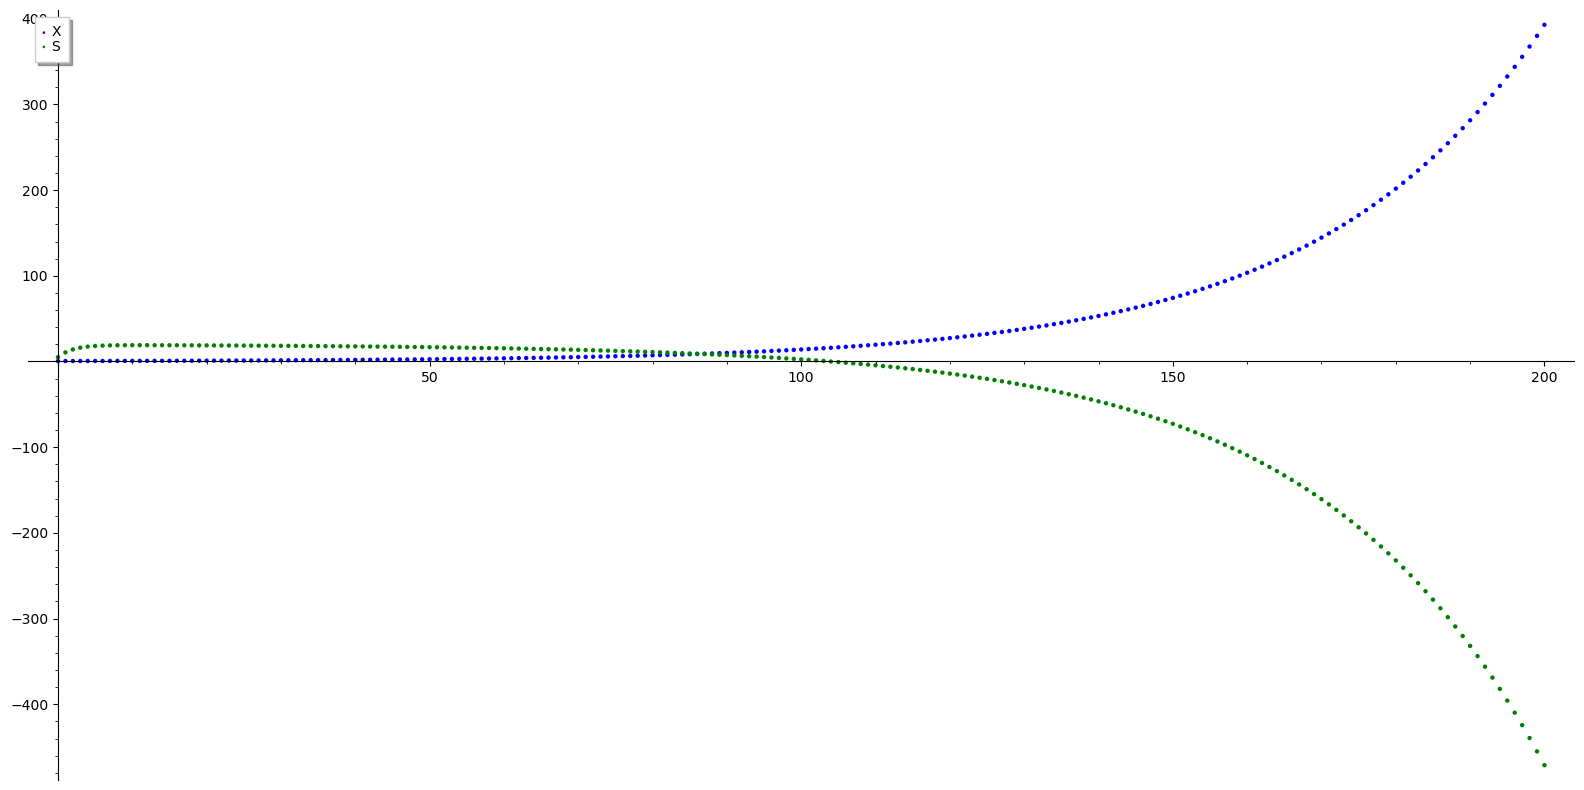

In [103]:
def plot_sol(sol):
    sim = get_sim_array(sol)
    P = list_plot(sim[:,0],legend_label='X')
    colors = ['blue','green']
    for i,var in enumerate(['S']):
        P += list_plot(sim[:,i+1],color=colors[i+1],legend_label=var)
   
    show(P, figsize=(16, 8))
plot_sol(T.solution)

In [104]:
T = ode_solver()
T.function = model
T.algorithm='rk8pd'
inits = [0.5, 5.0]
tspan = [0,75]
T.ode_solve(tspan, inits, num_points=200, params=[mu, D, Sf, Y, mumax, Ks])

In [105]:
def get_sim_array(sol):
    sim = np.array([y for t,y in sol])
    return sim
get_sim_array(T.solution)

array([[  0.5       ,   5.        ],
       [  0.51265756,   9.47939467],
       [  0.52563555,  12.55268637],
       [  0.53894208,  14.65944319],
       [  0.55258546,  16.10177212],
       [  0.56657423,  17.08730457],
       [  0.58091712,  17.75873975],
       [  0.59562311,  18.21414961],
       [  0.61070138,  18.52093417],
       [  0.62616136,  18.72541285],
       [  0.64201271,  18.85941652],
       [  0.65826534,  18.94481809],
       [  0.6749294 ,  18.99664642],
       [  0.69201532,  19.02522637],
       [  0.70953377,  19.03764971],
       [  0.72749571,  19.03878602],
       [  0.74591235,  19.0319775 ],
       [  0.76479521,  19.01951645],
       [  0.78415609,  19.00297349],
       [  0.8040071 ,  18.98342309],
       [  0.82436064,  18.96159862],
       [  0.84522942,  18.93799887],
       [  0.86662651,  18.91296127],
       [  0.88856526,  18.88671224],
       [  0.9110594 ,  18.85940173],
       [  0.93412298,  18.83112701],
       [  0.95777041,  18.801949  ],
       [  0.98201649,  18.77190345],
       [  1.00687635,  18.74100872],
       [  1.03236555,  18.70927101],
       [  1.05850001,  18.67668801],
       [  1.08529606,  18.64325141],
       [  1.11277046,  18.6089486 ],
       [  1.14094038,  18.57376382],
       [  1.16982343,  18.537679  ],
       [  1.19943765,  18.50067427],
       [  1.22980156,  18.46272835],
       [  1.26093413,  18.42381879],
       [  1.29285483,  18.38392215],
       [  1.32558361,  18.3430141 ],
       [  1.35914091,  18.30106946],
       [  1.39354773,  18.25806231],
       [  1.42882556,  18.21396597],
       [  1.46499645,  18.16875301],
       [  1.50208301,  18.12239525],
       [  1.54010842,  18.0748638 ],
       [  1.57909645,  18.02612897],
       [  1.61907147,  17.97616034],
       [  1.66005846,  17.9249267 ],
       [  1.70208304,  17.87239605],
       [  1.74517148,  17.81853555],
       [  1.78935071,  17.76331155],
       [  1.83464833,  17.70668953],
       [  1.88109268,  17.64863412],
       [  1.92871277,  17.58910902],
       [  1.97753836,  17.52807703],
       [  2.02759998,  17.46550001],
       [  2.07892892,  17.40133884],
       [  2.13155726,  17.33555342],
       [  2.18551789,  17.26810264],
       [  2.24084454,  17.19894433],
       [  2.29757178,  17.12803527],
       [  2.35573509,  17.05533113],
       [  2.41537081,  16.98078649],
       [  2.47651621,  16.90435473],
       [  2.53920952,  16.8259881 ],
       [  2.60348991,  16.74563761],
       [  2.66939757,  16.66325303],
       [  2.7369737 ,  16.57878288],
       [  2.80626051,  16.49217436],
       [  2.87730134,  16.40337333],
       [  2.95014057,  16.31232429],
       [  3.02482373,  16.21897033],
       [  3.10139751,  16.12325311],
       [  3.17990976,  16.0251128 ],
       [  3.26040956,  15.92448805],
       [  3.34294722,  15.82131597],
       [  3.42757433,  15.71553208],
       [  3.51434379,  15.60707026],
       [  3.60330983,  15.49586272],
       [  3.69452805,  15.38183994],
       [  3.78805547,  15.26493066],
       [  3.88395055,  15.14506181],
       [  3.98227323,  15.02215846],
       [  4.08308496,  14.8961438 ],
       [  4.18644874,  14.76693907],
       [  4.2924292 ,  14.6344635 ],
       [  4.40109256,  14.4986343 ],
       [  4.51250675,  14.35936656],
       [  4.6267414 ,  14.21657325],
       [  4.74386792,  14.0701651 ],
       [  4.86395951,  13.92005062],
       [  4.98709123,  13.76613597],
       [  5.11334004,  13.60832495],
       [  5.24278486,  13.44651892],
       [  5.37550659,  13.28061676],
       [  5.51158819,  13.11051476],
       [  5.65111471,  12.93610661],
       [  5.79417336,  12.7572833 ],
       [  5.94085356,  12.57393305],
       [  6.09124698,  12.38594127],
       [  6.24544763,  12.19319046],
       [  6.40355189,  11.99556014],
       [  6.56565858,  11.79292678],
       [  6.73186902,  11.58516373],
       [  6.90228709,  11.37214113],
       [  7.07701932,  11.15372585],
       [  7.25617492,  10.92978135],
    

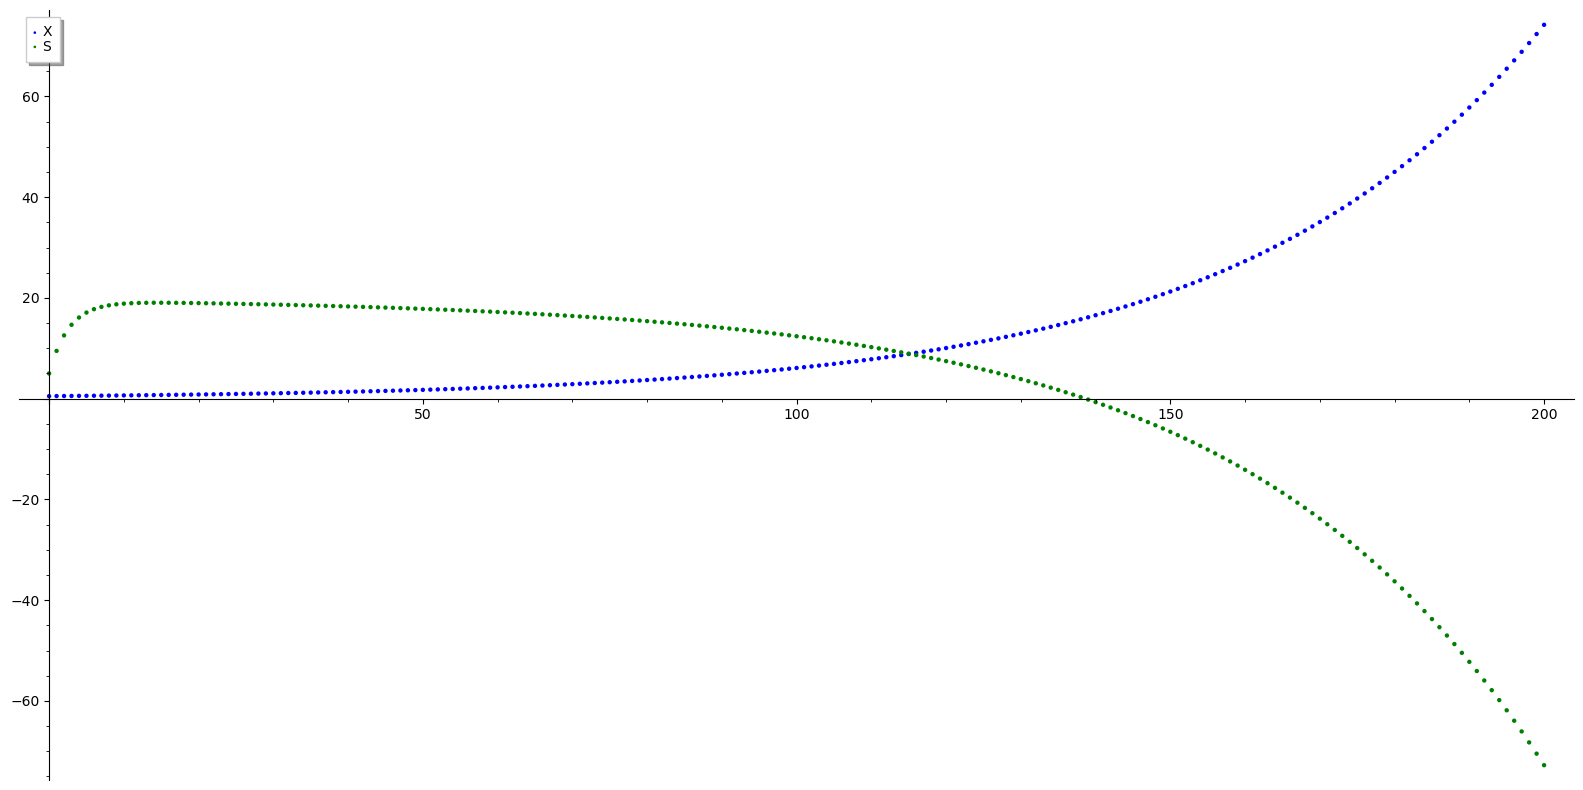

In [106]:
def plot_sol(sol):
    sim = get_sim_array(sol)
    P = list_plot(sim[:,0],legend_label='X')
    colors = ['blue','green']
    for i,var in enumerate(['S']):
        P += list_plot(sim[:,i+1],color=colors[i+1],legend_label=var)
   
    show(P, figsize=(16, 8))
plot_sol(T.solution)

In [125]:
var('x s mu D Sf X S mumax Ks')

mu=mumax*S/(Ks + S)

X = function('X')(t)
S = function('S')(t)
de1 = diff(X,t) == mu*X - D*X
de2 = diff(S,t) == D*Sf - D*S -(mu*X/Y)
sol = desolve_system([de1,de2],[X,S],ics=[0,500,0], ivar=t)
show(sol)

[X(t) == 500*e^(-(D*Ks + D*S - S*mumax)*t/(Ks + S)),
 S(t) == Sf - (Sf*Y - 500)*e^(-D*t)/Y - 500*e^(-(D*Ks + D*S - S*mumax)*t/(Ks + S))/Y]

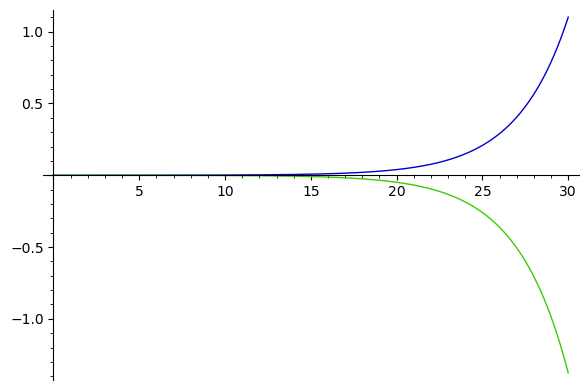

In [126]:
# Atribuindo  valores para as taxas de conversão:
solX, solS = sol[0].rhs(), sol[1].rhs()
plot((solX(mumax=1.6, Ks=1.0, D=1.0, Y=0.8, Sf=20.0, mu=mumax*S/(Ks+S), X=0.5, S=5.0),solS(mumax=1.6, Ks=1.0, D=1.0, Y=0.8, Sf=20.0, mu=mumax*S/(Ks+S), X=0.5, S=5.0)),(t,0,30))

In [142]:
def ODEsys(t,y,params):
    mumax, Ks, D, Y, Sf = params
    X,S = y
    return[(mumax*S/(Ks+S))*X - D*X, #dX/dt
        D*Sf - D*S -((mumax*S/(Ks+S))*X/Y) # dS/dt
          ]

In [143]:
T=ode_solver()
T.algorithm="rk8pd"
T.function=ODEsys
T.ode_solve(y_0=[0.5,5.0],t_span=[0,50],params=[1.6, 1.0, 1.0, 0.8, 20.0],num_points=200)

In [144]:
T.solution[:10]

[(0, [0.500000000000000, 5.00000000000000]),
 (0.25, [0.5508154106859479, 8.11621947999112]),
 (0.5, [0.6156267429334993, 10.511588337964021]),
 (0.75, [0.6926353176917815, 12.34393665723319]),
 (1.0, [0.7821561250298863, 13.734037876873197]),
 (1.25, [0.8852470473593016, 14.77493473593567]),
 (1.5, [1.0033864743221768, 15.538270854963697]),
 (1.75, [1.138378573332775, 16.079026346234016]),
 (2.0, [1.2923291674844464, 16.439143844118284]),
 (2.25, [1.4676488596408022, 16.65032507237235])]

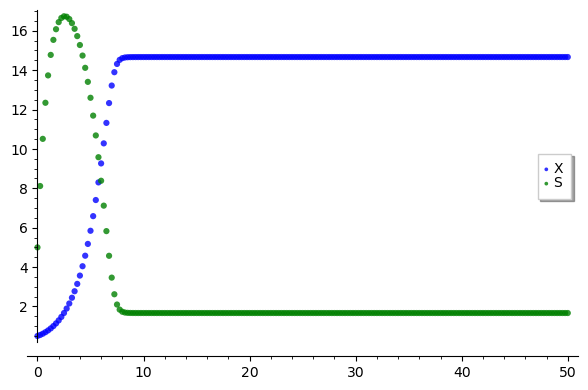

In [145]:
x=list_plot([(i[0],i[1][0]) for i in T.solution],color='blue', pointsize=20, legend_label='X', alpha=.8)
s=list_plot([(i[0],i[1][1]) for i in T.solution],color='green', pointsize=20, legend_label='S', alpha=.8)
x.legend()
s.legend()
show(x+s)

In [147]:
var('X S mumax Ks D Y Sf')
dxdt(X, S) = (mumax*S/(Ks+S))*X - D*X
dsdt(X, S) = D*Sf - D*S -((mumax*S/(Ks+S))*X/Y)
eqs = solve([dxdt, dsdt], [X, S])
show(html("<h4>Equilíbrios:</h4>"))
show(eqs)

<h4>Equilíbrios:</h4>

[[X == 0, S == -Ks], [X == 0, S == Sf], [X == -(Sf*Y*mumax - (D*Ks + D*Sf)*Y)/(D - mumax), S == -D*Ks/(D - mumax)]]

mumax = 1.6

Ks = 1.0

D = 1.0

Y = 0.8

Sf = 20.0

In [148]:
M = matrix([[1.6, 1.0, 1.0, 0, 0],[1.6, 1.0, 1.0, 0.8, 20.0]])
show("M=",M) 
Y = matrix([[X],[S]])
show("Y=",Y)
M*Y

'M=' [ 1.60000000000000  1.00000000000000  1.00000000000000 0.000000000000000 0.000000000000000]
[ 1.60000000000000  1.00000000000000  1.00000000000000 0.800000000000000  20.0000000000000]

'Y=' [X]
[S]

TypeError: unsupported operand parent(s) for *: 'Full MatrixSpace of 2 by 5 dense matrices over Real Field with 53 bits of precision' and 'Full MatrixSpace of 2 by 1 dense matrices over Symbolic Ring'